# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

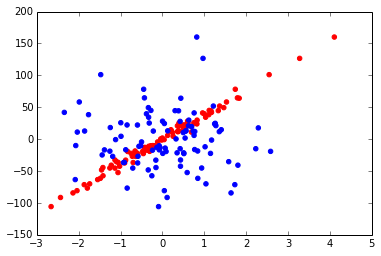

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print test_labels

[ -22.32195021   14.76930132  -70.11132234   45.05465366  -12.0017312
   44.41658249  -26.87743177  -35.32062686   17.64282734    4.45578287
  -80.80239408  -91.477377    -12.98848753    0.34799656   13.31981235
    5.86887774   27.83791274  -45.38589148  -10.06708677   64.19559505
   10.33267887   28.15553021  -63.4056294   -27.02798161  -10.29545833
  -16.79027112   25.24428409  -45.27502383  -76.75213382  101.14760598]


In [8]:
print predictions

[-23.24316906   7.01310816 -66.61813123  41.58354869  -7.68806582
  43.26205258 -28.06455063 -42.36834697  20.20833212   8.90890175
 -78.11613996 -93.06504701 -16.67869844  -2.26743003  13.71600034
   3.97989675  22.36354263 -43.80213772  -9.50822858  68.80482263
   8.39058722  22.02089048 -59.48354625 -24.99400399 -11.26739405
 -15.02211181  14.23872752 -48.33161191 -68.79089006  95.83971221]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

3.5186158533908887

In [10]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


/Library/Python/2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Python/2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Python/2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Python/2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Python/2.7/site-packages/sklearn/metrics/scorer.py:

In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [13]:
coef

array([ 38.07925837,   0.        ])

In [14]:
linear_regressor.coef_

array([  3.79048906e+01,   3.71534698e-02])

In [15]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.77963658608317599

In [16]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [17]:
print "y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_)

y = 37.90*x1 + 0.04*x2 + -0.78


#### Lasso

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [19]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [20]:
print lasso_regressor.coef_

[ 37.11996333  -0.        ]


In [21]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [22]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.12*x1 + -0.00*x2
